<a href="https://colab.research.google.com/github/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_2/Data_Frames_and_ML_HW_2_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
1. In AI, datasets are often very large and cannot be processed all at once as is done in the loop in the [Linear Regression using SGD notebook](https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_2/01_linear_regression_sgd.ipynb). The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".
2. As described above, learning rates that grow smaller over time can help find and get closer to global minima. In the loop in code [Linear Regression using SGD notebook](https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_2/01_linear_regression_sgd.ipynb), our `learning_rate_m` and `learning_rate_b` are constant through the process of minimizing our parameters. How could you change the loop to reduce the learning rates over loop iterations? (this is called [learning rate decay](https://youtu.be/QzulmoOg2JE?si=3RZdptc4kLxskWze))


[029]  dy_i = 88.81 * x + 29252.91     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1322194302.403424


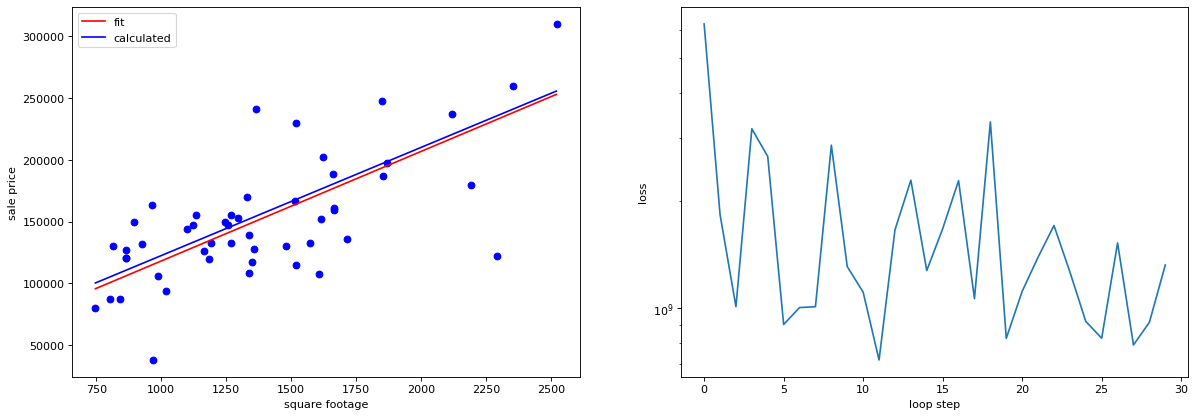

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

data = pd.read_csv('https://raw.githubusercontent.com/JaredKeithAveritt/ai-science-training-series/main/01_machineLearning/slimmed_realestate_data.csv')
print(data.columns)

n = len(data)

x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))


# saving these for later comparison
m_calc = m
b_calc = b


def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')


def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm


def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db


def model(x,m,b):
   return m * x + b


def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
batch_size = 50
# we run our loop N times
loop_N = 30
for i in range(loop_N):

   # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
   data_batch = data.sample(batch_size)
   data_x = data_batch['GrLivArea'].to_numpy()
   data_y = data_batch['SalePrice'].to_numpy()

   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

   # close/delete previous plots
   plt.close('all')

   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y)
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

3. Follow the example from the [Linear Regression using SGD notebook](https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_2/01_linear_regression_sgd.ipynb) and build a loop that properly finds the centers of the 4 clusters using k-means in the [clustering notebook](https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_2/02_clustering.ipynb).
